In [0]:
import tensorflow as tf
from tensorflow.python import keras
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import plot_model

from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.python.keras.utils import np_utils
import matplotlib.pyplot as plt

In [0]:
# Loading the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

from tensorflow.python.keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [0]:
#Parameters
weight_decay = 0.0005
batch_size = 64
epochs = 200
data_augmentation = True
x_shape = [32,32,3]


# create model
model = Sequential()

# first block of conv2D, 64 filters, size of filters (3,3)
model.add(Conv2D(64,(3,3), padding='same',activation='relu',input_shape=(x_shape)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),padding='same'))

# second block of conv2D
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),padding= 'same'))

# third block of conv2D
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),padding='same'))

# fouth block of conv2D
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),padding='same'))

# fifth block of conv2D
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),padding='same'))

# Dense layer
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


In [0]:
from tensorflow.keras import optimizers

#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.SGD(lr=0.005, decay=0, nesterov=True) #0.0005
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
'''
Data augmentation rotates, shears, zooms, etc the image so that the model learns to generalize and 
not remember specific data. If the model overfits, 
it will perform very well on the images that it already knows but will fail if new images are given to it.
'''
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [0]:
'''
To use less memory and make model faster we are using 64 images at a time and train them 
'''
train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)

In [0]:
#history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size = 128) # verbose=2
history = model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=50, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/50
937/937 [==============================] - 76s 81ms/step - loss: 2.1910 - accuracy: 0.2559 - val_loss: 1.7969 - val_accuracy: 0.3669
Epoch 2/50
937/937 [==============================] - 75s 81ms/step - loss: 1.5702 - accuracy: 0.4372 - val_loss: 1.4497 - val_accuracy: 0.4810
Epoch 3/50
937/937 [==============================] - 76s 81ms/step - loss: 1.3077 - accuracy: 0.5393 - val_loss: 1.1664 - val_accuracy: 0.5949
Epoch 4/50
937/937 [==============================] - 76s 81ms/step - loss: 1.1376 - accuracy: 0.6008 - val_loss: 1.0432 - val_accuracy: 0.6429
Epoch 5/50
937/937 [==============================] - 75s 80ms/step - loss: 1.0208 - accuracy: 0.6416 - val_loss: 0.9732 - val_accuracy: 0.6583
Epoch 6/50
937/937 [==============================] - 75s 80ms/step - loss: 0.9138 - accuracy: 0.6821 - val_loss: 0.9023 - val_accuracy: 0.6936
Epoch 7/50
937/937 [==============================] - 75s 80ms/step - loss: 0.8372 - accuracy: 0.7077 - val_loss: 0.9793 - val_accuracy:

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

In [0]:
print("Accuracy on test set: ",score[1])

Accuracy on test set:  0.8030999898910522


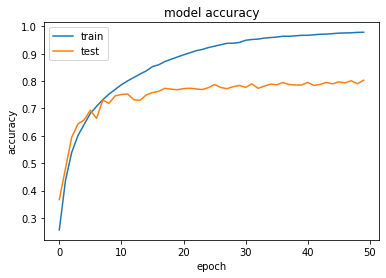

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

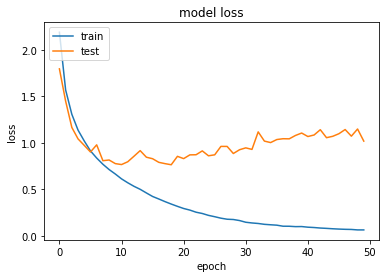

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()